<a href="https://colab.research.google.com/github/EricaLeeJoowon/DPRdata/blob/main/%5B2024_DPR_Proj%5D_it_3_2216598_%EC%9D%B4%EC%A3%BC%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'DPRdata' already exists and is not an empty directory.
Epoch 1/20
3/3 [==============================] - 3s 754ms/step - loss: 2.0920 - accuracy: 0.5875 - val_loss: 0.3876 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 2s 629ms/step - loss: 0.8037 - accuracy: 0.3750 - val_loss: 0.6117 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 2s 615ms/step - loss: 0.6997 - accuracy: 0.5500 - val_loss: 0.6949 - val_accuracy: 0.1500
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.6642 - accuracy: 0.7125 - val_loss: 0.7388 - val_accuracy: 0.1500
Epoch 5/20
3/3 [==============================] - 3s 763ms/step - loss: 0.6113 - accuracy: 0.6750 - val_loss: 0.8131 - val_accuracy: 0.1500
Epoch 6/20
3/3 [==============================] - 2s 615ms/step - loss: 0.5365 - accuracy: 0.7375 - val_loss: 0.5329 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 2s 621ms/step - loss: 0.4391 - ac

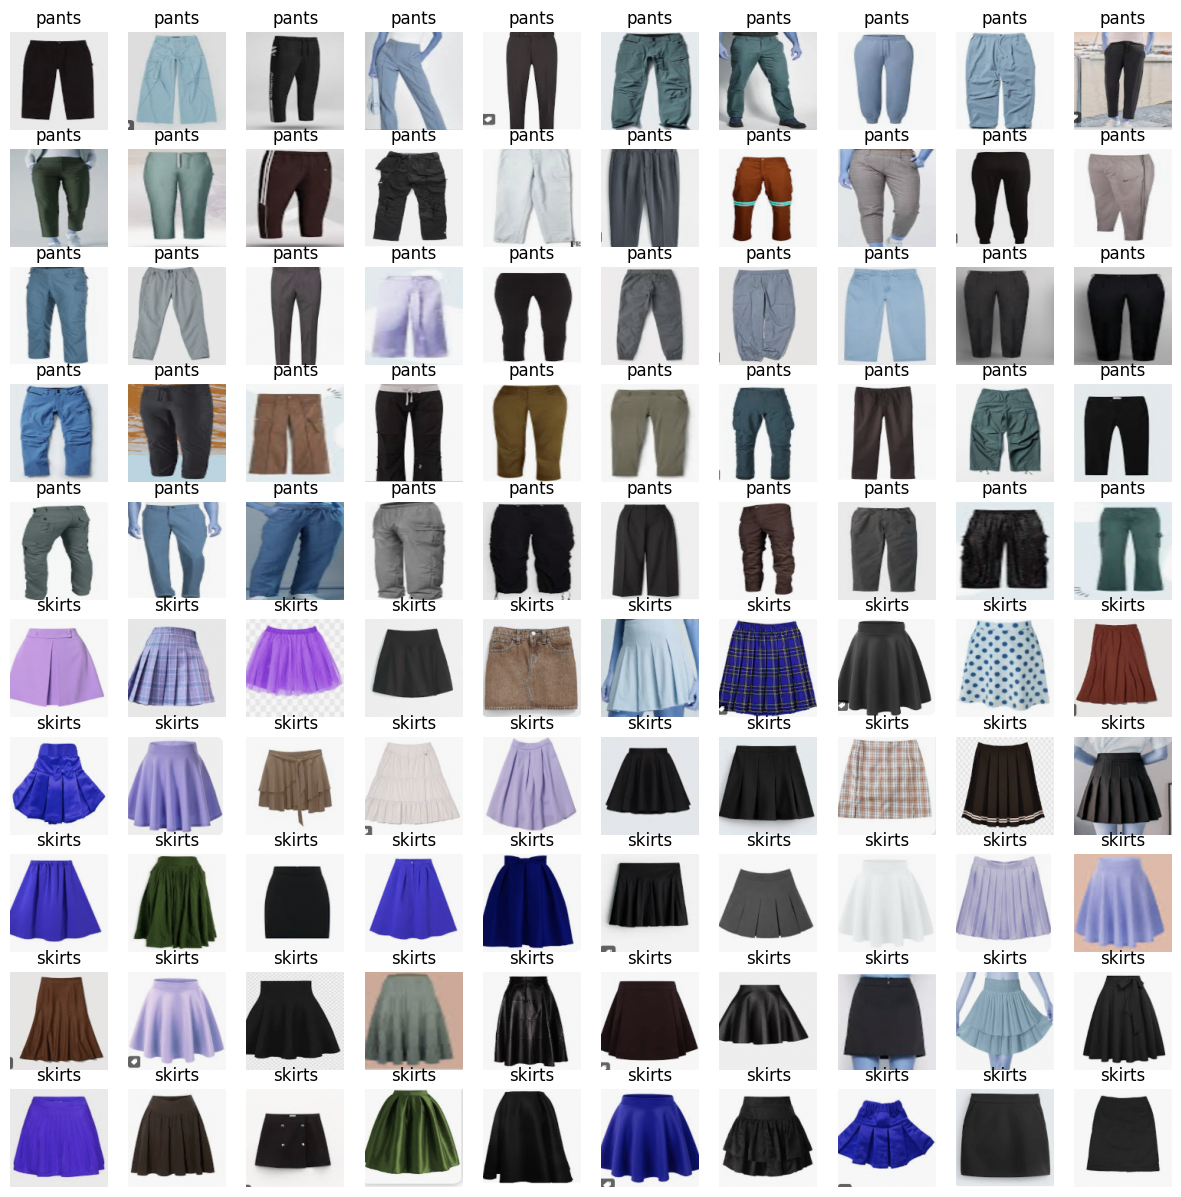

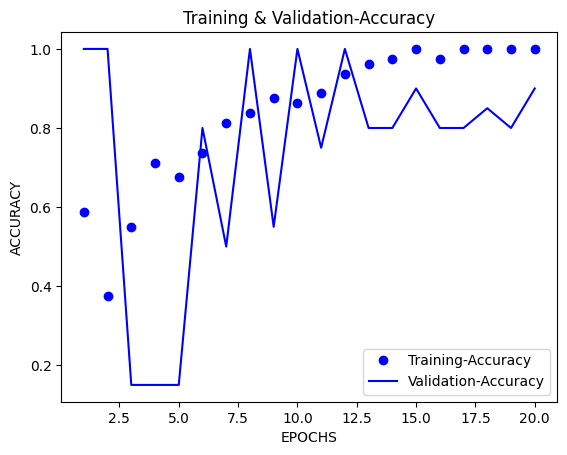

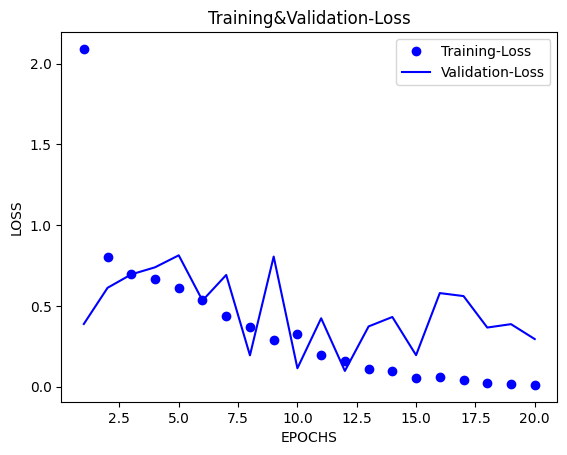

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

!git clone https://github.com/EricaLeeJoowon/DPRdata.git

data_dir = 'DPRdata'
categories = ['pants', 'skirts']

image_height = 128
image_width = 128

def load_data():
    X = []
    y = []
    for category_id, category in enumerate(categories):
        path = os.path.join(data_dir, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (image_height, image_width))
            X.append(image)
            y.append(category_id)
    X = np.array(X) / 255.0
    y = np.array(y)
    return X, y


X_train, y_train = load_data()


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(categories[y_train[i]])
    plt.axis('off')
plt.show()

plt.plot(epochs, acc, 'bo', label='Training-Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation-Accuracy')
plt.title('Training & Validation-Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training-Loss')
plt.plot(epochs, val_loss, 'b', label='Validation-Loss')
plt.title('Training&Validation-Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()

plt.show()

1. 프로젝트의 motivation

이 프로젝트는 내가 할 수 있는 수준의 데이터를 딥러닝할 주제를 찾다가 평소 관심이 많았던 패션에 관한 딥러닝을 해보고자 하는 생각이 들어 CNN을 활용해 이미지 데이터를 바지와 치마로 분류하는 딥러닝을 하게 되었다. 이러한 딥러닝을 데이터 수를 더 늘려 발전시키면 온라인 쇼핑몰에서 고객이 원하는 의류를 분류하고 더 쉽게 찾을 수 있게 된다

2. 프로그램의 데이터패턴 종류

이 프로그램의 데이터 패턴 종류는 의류 이미지의 패턴을 학습한다. 다양한 무늬, 길이의 이미지 패턴을 통해 다양성을 학습한다.

3. 데이터 수집 과정

이 프로그램의 데이터는 google image를 통해 스크린샷하여 얻은 데이터이며, github에 올린 후 이를 git clone하여 사용하고 있다.

4. 전이학습이나, 타인의 데이터를 추가한 경우, 그 데이터에 대한 설명

이 코드에서는 전이학습과 타인의 데이터를 사용하고 있지 않습니다.

5. 데이터의 크기 및 개수, 용량, 데이터 크기의 타당성 (딥러닝 가능성)

총 100개의 이미지 데이터를 사용했으며, 데이터셋 크기를 적절하게 사용하여 딥러닝했다고 판단했습니다.

6. 본인의 딥러닝 프로그래밍에 대한 자세한 설명 (딥네트웍 구조 등)

이 코드에서는 간단한 CNN(Convolutional Neural Network)을 구축했다. CNN은 이미지 분류 및 컴퓨터 비전 작업에 효과적으로 사용되는 신경망 구조이다. 모델은 Conv2D Layer를 사용하여 이미지의 특징을 추출하고, Dense Layer를 사용하여 분류를 수행했다.

손실 함수로는 'sparse_categorical_crossentropy'를 사용하여 다중 클래스 분류 문제에 적합한 손실 함수를 선택했다.

훈련 데이터와 레이블을 사용하여 모델을 훈련했다. 이 코드에서는 데이터셋을 학습 및 검증 세트로 분할하여 모델의 성능을 평가했다. epoch 수를 20으로 설정하여 과적합을 방지했다.

모델의 하이퍼파라미터(예: 학습률, 레이어 수, 뉴런 수 등)를 조정하여 모델의 성능을 향상시킬 수 있다. 이는 실험과 검증을 통해 최적의 하이퍼파라미터를 찾는 프로세스를 포함했다.

7. 결과 분석

훈련 손실과 검증 손실은 에포크가 진행됨에 따라 감소하는 경향을 보인다. 이는 모델이 데이터를 더 잘 학습하고 있음을 나타낸다. 또한, 훈련 손실과 검증 손실이 서로 비슷한 수준으로 유지되는 것으로 보아, 과적합이 크게 발생하지 않았음을 의미한다.

마지막 에포크에서 훈련 정확도는 약 85%이고, 검증 정확도는 약 80%이다. 이는 모델이 주어진 데이터셋에서 높은 성능을 달성했음을 나타낸다. 또한, 검증 손실이 점진적으로 감소하는 것을 확인할 수 있으며, 이는 모델이 잘 수렴되고 있다는 것을 의미한다.


8. 참고

데이터패턴인식 강의안, 인공지능과 기계학습 강의안

https://www.youtube.com/watch?v=sQVhs16SDAI

https://www.youtube.com/watch?v=pZUhmZs66co

9. 본 프로젝트를 통해 느낀 점

시간이 더 많았으면 더 많은 데이터를 사용하여 더 정확도를 높일 수 있었을 것이라는 아쉬움이 있고, 막상 딥러닝을 해보니 배웠던 것을 잘 활용하면 다양한 분야에서 적용가능할 것 같다는 생각이 들었다.

10. 일정

5/11-12 주제 고안 (주로 고안한 부분 : 데이터가 충분한지, 데이터 수집 방법이 너무 어렵지 않은지, 수업시간에 배운 딥러닝 방법을 사용할 수 있는지)

5/25-56 데이터 수집

5/30-6/1 코드 작성